In [1]:
import matplotlib.pyplot as plt
from dipy.core.gradients import gradient_table
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti, load_nifti_data

In [80]:
TRAIN_DATA = '../train_data'

In [81]:
# read diffusion data
diffussionData, affine, img = load_nifti(TRAIN_DATA+'/case_1/Diffusion.nii.gz', return_img=True)

In [82]:
# read labels data
labels = load_nifti_data(TRAIN_DATA+'/case_1/OR_right.nii.gz')

In [83]:
# read tensor data
bvals, bvecs = read_bvals_bvecs(TRAIN_DATA+'/case_1/Diffusion.bvals', TRAIN_DATA+'/case_1/Diffusion.bvecs')

In [84]:
# generate gradient table from bvals and bvecs
gtab = gradient_table(bvals, bvecs)

In [85]:
white_matter = (labels == 1) | (labels == 2)

## Orientation Distribution Function (ODF)

In [2]:
from dipy.viz import window, actor, has_fury
from dipy.reconst.csdeconv import auto_response_ssst
from dipy.reconst.shm import CsaOdfModel
from dipy.data import default_sphere
from dipy.direction import peaks_from_model

In [102]:
response, ratio = auto_response_ssst(gtab, diffussionData, roi_radii=10, fa_thr=0.7)

In [103]:
csa_model = CsaOdfModel(gtab, sh_order=6)

In [104]:
csa_peaks = peaks_from_model(csa_model, diffussionData, default_sphere,
                             relative_peak_threshold=.1,
                             min_separation_angle=25,
                             mask=white_matter)

In [16]:
# show direction field slice
if has_fury:
    scene = window.Scene()
    scene.add(actor.peak_slicer(csa_peaks.peak_dirs,
                                csa_peaks.peak_values,
                                colors=None))
    window.record(scene, out_path='csa_direction_field.png', size=(500, 500))
    if interactive:
        window.show(scene, size=(400, 400))

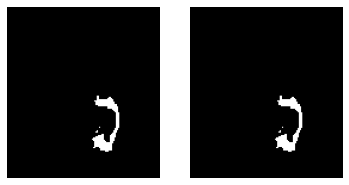

In [105]:
sli = csa_peaks.gfa.shape[2] // 2
plt.figure('GFA')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(csa_peaks.gfa[:, :, sli].T, cmap='gray', origin='lower')

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((csa_peaks.gfa[:, :, sli] > 0).T, cmap='gray', origin='lower')

plt.savefig('gfa_tracking_mask.png')

In [37]:
csa_peaks.gfa.shape

(128, 144, 128)

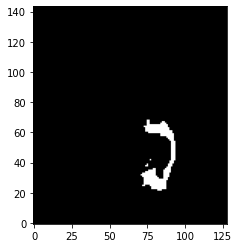

In [78]:
plt.imshow(white_matter[:, :, sli].T, cmap='gray', origin='lower')

In [60]:
white_matter.shape

(81, 106, 76)

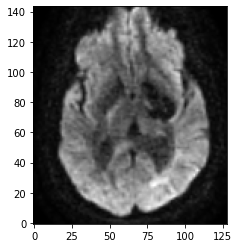

In [110]:
plt.imshow(diffussionData[:, :, sli,4].T, cmap='gray', origin='lower')

In [48]:
from dipy.data import get_fnames
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
label_fname = get_fnames('stanford_labels')

data, affine, hardi_img = load_nifti(hardi_fname, return_img=True)
labels = load_nifti_data(label_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)
gtab = gradient_table(bvals, bvecs)

In [49]:
white_matter = (labels == 1) | (labels == 2)

In [6]:
response, ratio = auto_response_ssst(gtab, data, roi_radii=20, fa_thr=0.5)
csa_model = CsaOdfModel(gtab, sh_order=6)

In [7]:
csa_peaks = peaks_from_model(csa_model, data, default_sphere,
                             relative_peak_threshold=.8,
                             min_separation_angle=45,
                             mask=white_matter)

In [ ]:
if has_fury:
    scene = window.Scene()
    scene.add(actor.peak_slicer(csa_peaks.peak_dirs,csa_peaks.peak_values,colors=None))
    window.record(scene, out_path='csa_direction_field.png', size=(900, 900))
    #window.show(scene, size=(800, 800))
    #window.ShowManager(scene).exit()

In [ ]:
window.ShowManager(scene).exit()

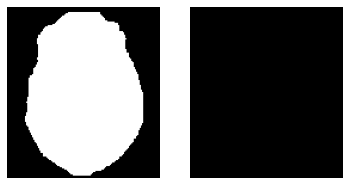

In [51]:
sli = csa_peaks.gfa.shape[2] // 2
plt.figure('GFA')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(csa_peaks.gfa[:, :, sli].T, cmap='gray', origin='lower')

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((csa_peaks.gfa[:, :, sli] > 0.25).T, cmap='gray', origin='lower')

plt.savefig('gfa_tracking_mask.png')

In [11]:
csa_peaks.gfa.shape

(81, 106, 76)

In [12]:
data.shape

(81, 106, 76, 160)